<center><span style="font-size:24px">UE2 _ Data viz examen_TCeau</span></center>

_Importation des packages nécessaires_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf

<center><h1 style="font-size: 20px;">I - Approche descriptive</h1></center>


<h1 style="font-size: 16px;">Première question d'étude : Comment a évolué le nombre moyen de buts par match entre 2003 et 2022?</h1>

_Importation des données_

In [2]:
# Importation avec le bon encodage du fichier
cbf=pd.read_csv(r"\campeonato-brasileiro-full.csv",header=0,index_col=0,encoding='latin-1')
# Renommage ID en partida_id
cbf.rename_axis("partida_id", inplace=True)
# Vérification de l'importation en affichant les premières lignes de code
cbf

,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
partida_id,,,,,,,,,,,,,,,
1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Â Brinco de Ouro,4,2,SP,RJ
2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Â Arena da Baixada,2,0,PR,RS
3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Â MaracanÃ£,1,1,RJ,PR
4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Â Serra Dourada,2,2,GO,PA
5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Â Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,38,13/11/2022,16:03,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,A. Cardoso de Oliveira,A. Ferreira,Cuiaba,Arena Pantanal,2,1,MT,PR
8022,38,13/11/2022,16:03,Bragantino,Fluminense,4-2-3-1,4-2-3-1,M. Nogueira Barbieri,F. Diniz Silva,Fluminense,NabizÃ£o,0,1,SP,RJ
8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,A. Stival,Atletico-MG,Neo QuÃ­mica Arena,0,1,SP,MG


_Visualisation des données manquantes_

<AxesSubplot:>

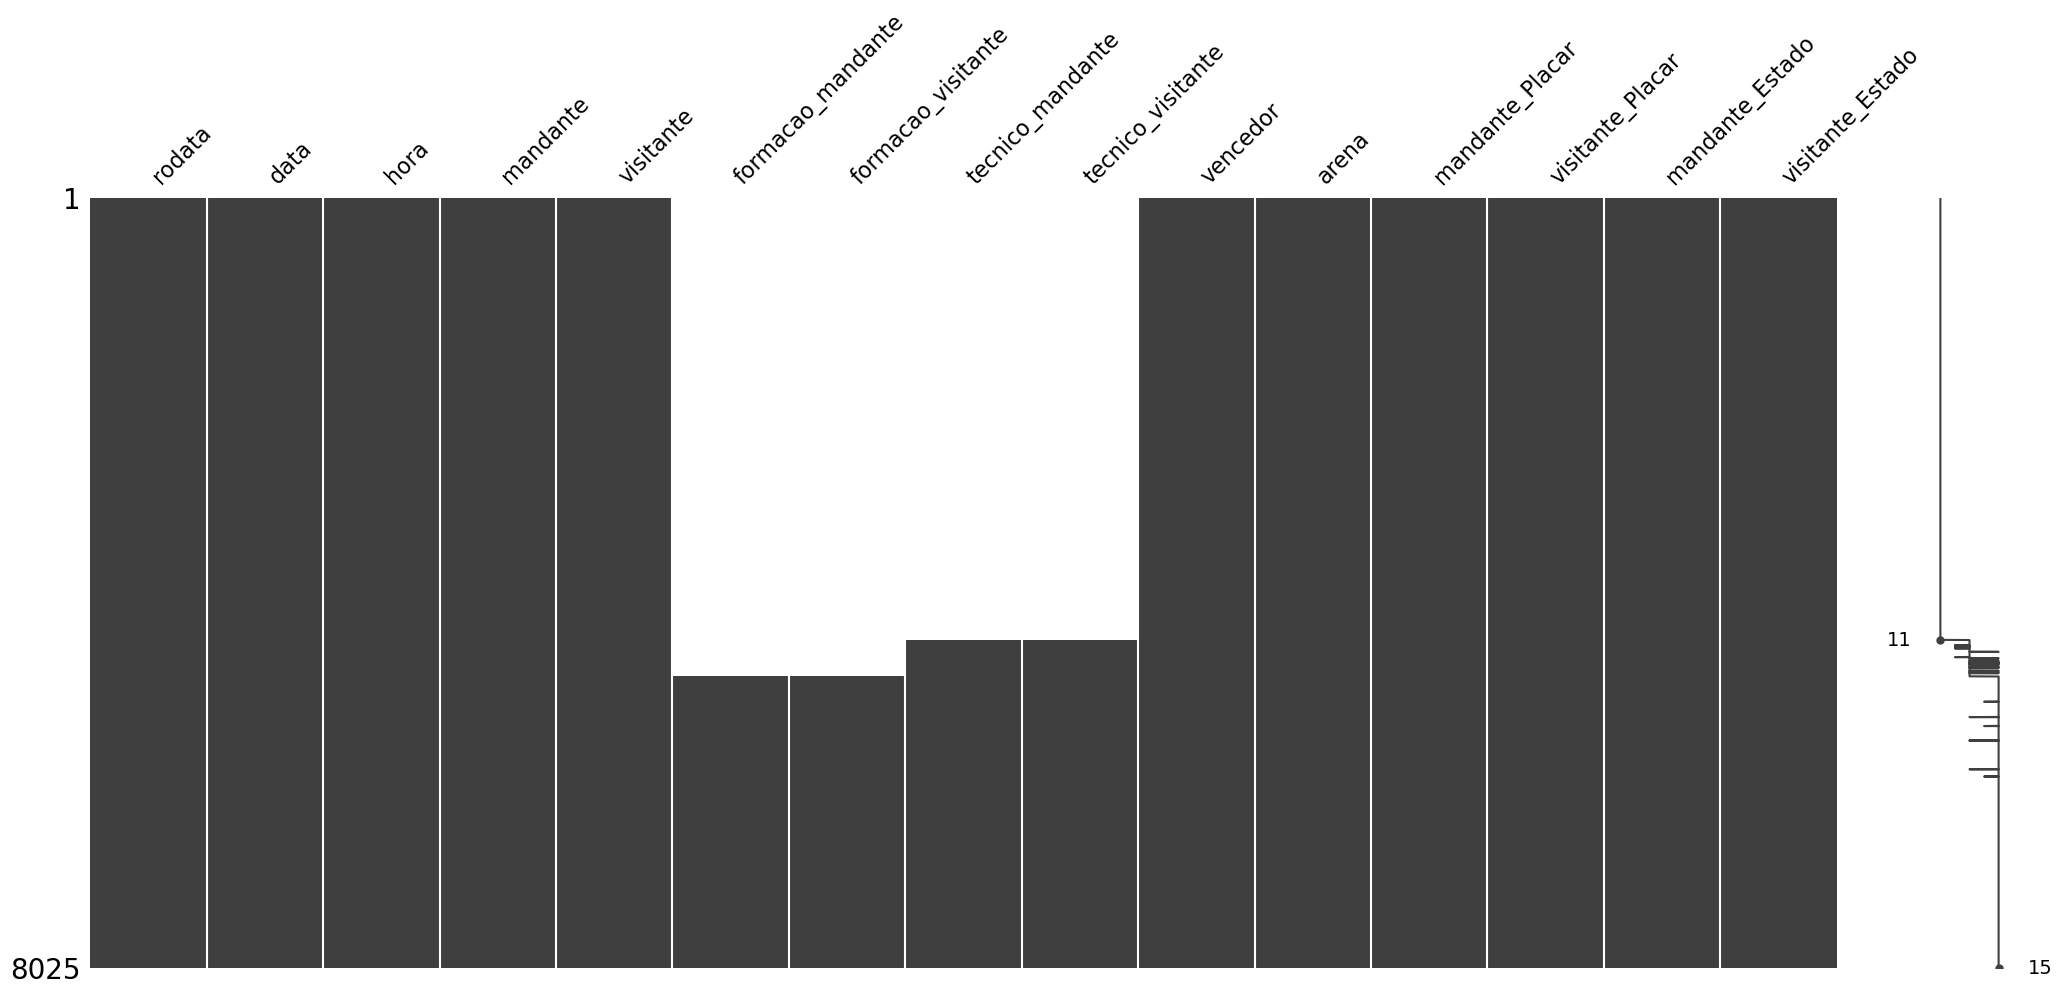

In [3]:
# Création d'une matrice de valeurs manquantes
msno.matrix(cbf)

Les seules données manquantes concernent les coachs et la formation choisie par l'équipe pour jouer le match. Nous avons donc déjà à disposition le nombre de buts par match entre 2003 et 2020, qui sera la somme des colonnes mandante_Placar et visitante_Placar.

_Calcul du nombre de buts par match pour chaque match joué en Série A entre 2003 et 2022_

In [4]:
# Transformation de la colonne 'data' en format date
cbf['data'] = pd.to_datetime(cbf['data'], format='%d/%m/%Y')

# Extraction de l'année de la colonne 'data' en transformation et nombre entier
cbf['ano'] = cbf['data'].dt.year
cbf['ano']=cbf['ano'].astype(int)

# Construction de la colonne qui contient tous les buts marqués par match
cbf['total_Placar'] = cbf['mandante_Placar'] + cbf['visitante_Placar']

# Sélection des colonnes d'intérêt du dataframe
gol=cbf[['rodata','ano','mandante_Placar','visitante_Placar','total_Placar']]

# Affichage du Dataframe
gol

,rodata,ano,mandante_Placar,visitante_Placar,total_Placar
partida_id,,,,,
1,1,2003,4,2,6
2,1,2003,2,0,2
3,1,2003,1,1,2
4,1,2003,2,2,4
5,1,2003,1,1,2
...,...,...,...,...,...
8021,38,2022,2,1,3
8022,38,2022,0,1,1
8023,38,2022,0,1,1


_Construction du graphique : "Nombre moyen de buts/match de 2003 à 2022"_

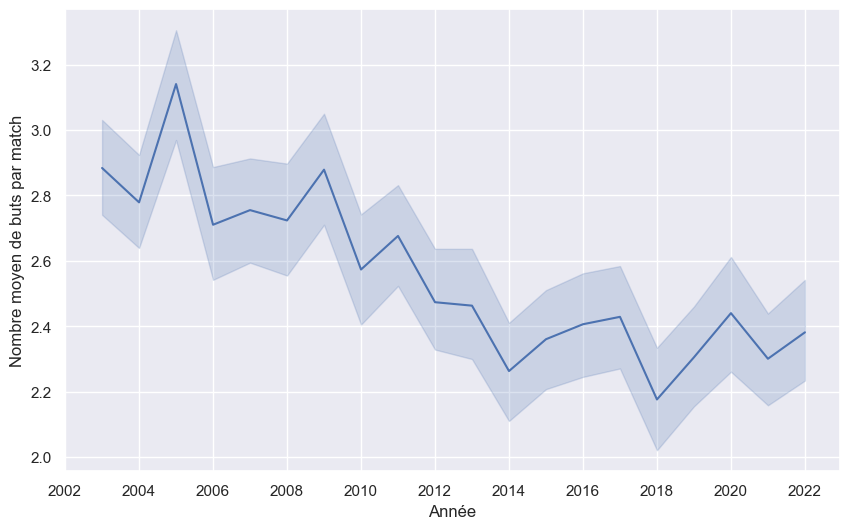

In [5]:
# Choix du style et de la taille de la figure
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Tracé du graphique d'évolution du nombre de buts par match en fonction de l'année
sns.lineplot(data=gol, x='ano', y='total_Placar')

# Graduation correcte de l'axe des abscisses
start_year = 2002
end_year = 2022
years = np.arange(start_year, end_year+1, 2)
plt.xticks(years)

# Ajout des titres et des labels
plt.xlabel("Année")
plt.ylabel("Nombre moyen de buts par match")

# Sauvegarde et affichage de la figure
plt.savefig('Nb_moyen_buts_annee',dpi=300)

On peut se demander si le stade dans lequel est joué un match a une influence sur le nombre de buts marqués. L'objectif est de voir si certains Etats du Brésil se détachent par la qualité (et le nombre) de leurs équipes en Série A ou non. 
Nous allons donc utiliser un nouveau dataframe sur lequel nous aurons également l'Etat du Brésil dans lequel le match a été joué.

_Sélection d'un dataframe avec l'Etat dans lequel a été joué le match et le nombre total de buts marqués dans chaque match entre 2003 et 2022_

In [6]:
# Sélection des données
arena=cbf[['mandante_Estado','total_Placar']]
arena

,mandante_Estado,total_Placar
partida_id,,
1,SP,6
2,PR,2
3,RJ,2
4,GO,4
5,RS,2
...,...,...
8021,MT,3
8022,SP,1
8023,SP,1


_Création du graphique permettant de voir le nombre moyen de buts par match pour chaque état du Brésil_

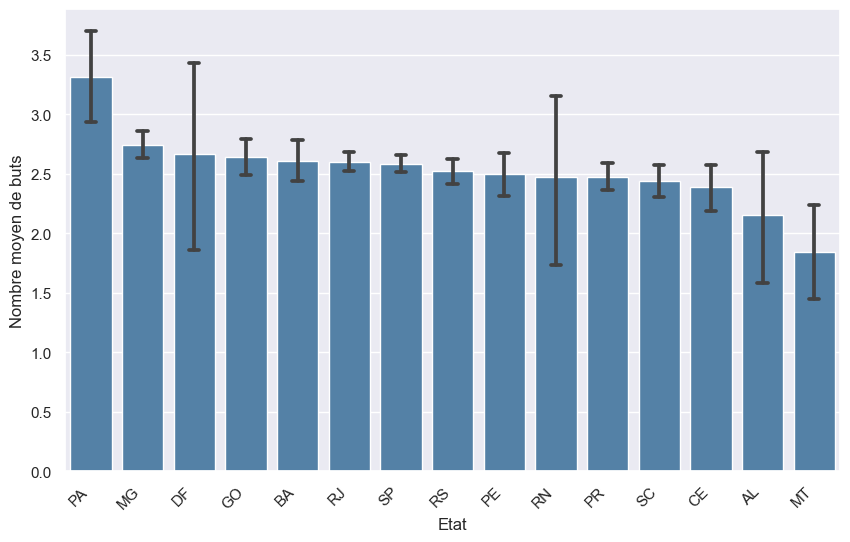

In [7]:
# Style et taille de la figure
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Histogramme (en ordonnant les Etats du nombre moyen le plus grand au plus petit)
ax=sns.barplot(data=arena, x='mandante_Estado', y='total_Placar',
               color='steelblue',capsize=0.2,
               order=['PA','MG','DF','GO','BA','RJ','SP','RS','PE','RN','PR','SC','CE','AL','MT'])

# Ajoutdes titres et des labels
plt.xlabel("Etat")
plt.ylabel("Nombre moyen de buts")

# Ajustement des étiquettes de l'axe des abscisses pour éviter la superposition
plt.xticks(rotation=45, ha='right')

# Sauvegarde de la figure
plt.savefig('nb_but_par_etat.png',dpi=300)

<h1 style="font-size: 16px;">Deuxième question d'étude : Comment évolue le nombre de buts au cours d'un match de Série A du championnat brésilien ? </h1>

Les données concernant les buts se trouvent dans un autre fichier, importé sous le nom cbg.

In [8]:
# Importation avec le bon encodage du fichier
cbg=pd.read_csv(r"\campeonato-brasileiro-gols.csv",header=0,index_col=0,encoding='latin-1')

# Vérification de l'importation en affichant les premières lignes de code
cbg

,rodata,clube,atleta,minuto,tipo_de_gol
partida_id,,,,,
4607,1,Fluminense,Fred,45,Penalty
4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
4607,1,Fluminense,Rafael SÃ³bis,31,NaN
4608,1,Internacional,Charles ArÃ¡nguiz,6,NaN
4611,1,Sao Paulo,AntÃ´nio Carlos dos Santos Aguiar,13,NaN
...,...,...,...,...,...
8019,38,Atletico-GO,Dudu,17,NaN
8021,38,Cuiaba,Jonathan CafÃº,44,NaN
8024,38,Internacional,Alexandre AlemÃ£o,39,NaN


On remarque que le nombre de match qui ont cette information a nettement diminué. Ici, les données disponibles commencent en 2014 (le premier match de 2014 a l'index 4607)

_Transformation du jeu de données pour isoler le temps additionnel de chaque mi-temps_

In [9]:
# Dataframe avec les lignes qui contiennent du temps additionnel
cbg_plus = cbg[cbg['minuto'].str.contains('\+')]
cbg_plus["minuto"].unique()

array(['90+2', '45+1', '90+1', '90+4', '90+3', '45+2', '45+3', '45+9',
       '90+5', '90+6', '45+4', '90+8', '45+5', '90+7', '90+13', '90+11',
       '45+7', '90+9', '45+6', '90+12', '45+13', '90+10', '45+10',
       '45+11', '45+8'], dtype=object)

In [10]:
# Transformation du temps additionnel en variable quantitative
additionnel={'45+1': 46, '45+2': 47,'45+3':48,'45+4':49,'45+5':50,'45+6':51,
             '45+7':52,'45+8':53,'45+9':54,'45+10':55,'45+11':56,'45+13':58,
            '90+1':91,'90+2':92,'90+3':93,'90+4':94,'90+5':95,'90+6':96,'90+7':97,
             '90+8':98,'90+9':99,'90+10':100,'90+11':101,'90+12':102,'90+13':103}

# Création d'une copie du dataframe et remplacement en valeurs quantitative sans "+"
cbg_plus_copy = cbg_plus.copy()
cbg_plus_copy['minuto'] = cbg_plus_copy['minuto'].replace(additionnel)

# Affichage du résultat obtenu
cbg_plus_copy

,rodata,clube,atleta,minuto,tipo_de_gol
partida_id,,,,,
4622,2,Sao Paulo,AntÃ´nio Carlos dos Santos Aguiar,92,NaN
4632,3,Internacional,Charles ArÃ¡nguiz,46,NaN
4646,4,Bahia,ParÃ¡,91,NaN
4640,4,Chapecoense,Tiago LuÃ­s Martins,92,NaN
4648,5,Cruzeiro,Ricardo Goulart,46,NaN
...,...,...,...,...,...
8016,38,Avai,Marcio Antonio de Sousa Junior,50,NaN
8018,38,Ceara,Vitor Mendes,47,Gol Contra
8025,38,Sao Paulo,Juan Santos da Silva,91,NaN


In [11]:
# Répartition du temps additionnel en deux mi-temps
cbg_plus_copy["minuto"]=cbg_plus_copy["minuto"].astype(int)
mi_tps1_add = cbg_plus_copy.loc[cbg_plus_copy['minuto'] < 90]
mi_tps2_add = cbg_plus_copy.loc[cbg_plus_copy['minuto'] > 90]

_Transformation du jeu de données initial pour obtenir les buts marqués dans le temps de jeu classique pour chaque mi-temps_

In [12]:
# Dataframe avec temps classique et transformation du temps classique en variable quantitative
cbg_without_plus = cbg[~cbg['minuto'].str.contains('\+')]
cbg_without_plus_copy=cbg_without_plus.copy()
cbg_without_plus_copy["minuto"]=cbg_without_plus_copy["minuto"].astype(int)

In [13]:
# Séparation du temps classique en deux mi-temps
mi_tps1 = cbg_without_plus_copy.loc[cbg_without_plus_copy['minuto'] <= 45]
mi_tps2 = cbg_without_plus_copy.loc[cbg_without_plus_copy['minuto'] > 45]

_Première mi-temps_

In [14]:
# Première mi-temps : fusion entre temps classique et temps additionnel
mi_tps1_final=pd.concat([mi_tps1, mi_tps1_add])

# Réinitialiser les index dans le DataFrame fusionné
mi_tps1_final = mi_tps1_final.reset_index(drop=True)

# Comptage du nombre de buts par minute
mi_tps1_final= mi_tps1_final.groupby(['minuto']).size().reset_index(name='count')

#Conversion minutes en radians pour graphique
mi_tps1_final['rad']=mi_tps1_final['minuto']*(np.pi)/30

# Affichage du dataframe obtenu
mi_tps1_final

,minuto,count,rad
0,0,1,0.000000
1,1,29,0.104720
2,2,48,0.209440
3,3,53,0.314159
4,4,68,0.418879
5,5,58,0.523599
6,6,76,0.628319
7,7,61,0.733038
8,8,72,0.837758
9,9,61,0.942478


_Construction du graphique représentant le nombre de buts marqués par minute pour l'ensemble des 7986 matchs_

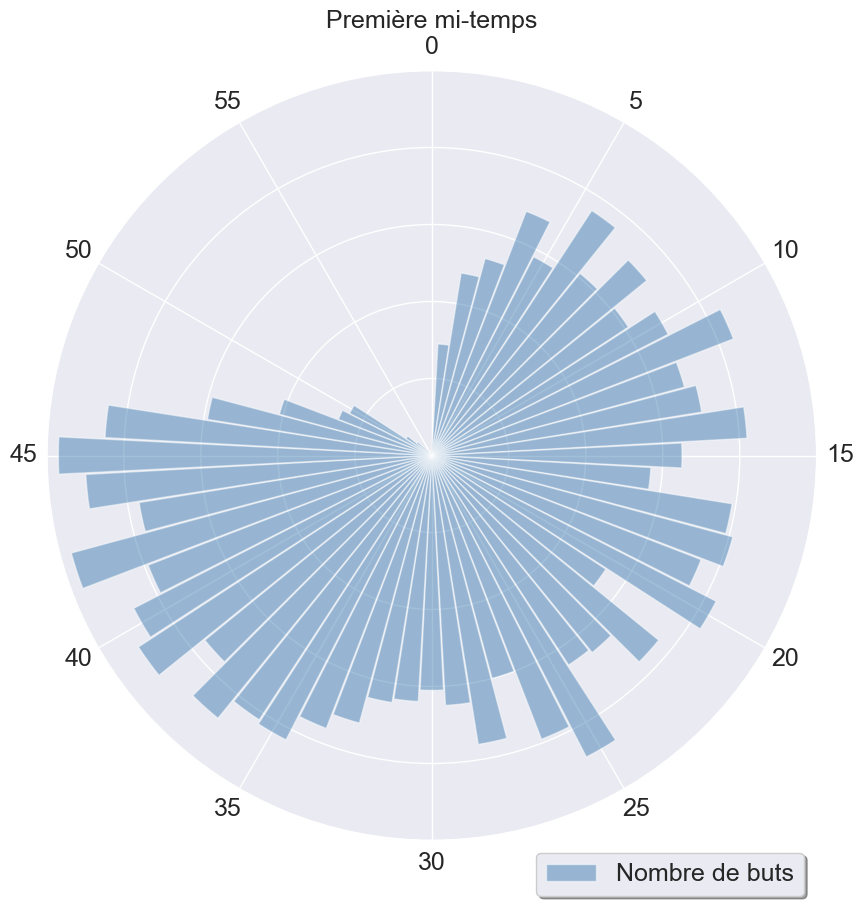

In [15]:
# Dimensions et forme de la figure pour ressembler à une horloge
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection = 'polar')

# Construction du diagramme en bâtons
ax.bar(mi_tps1_final['rad'],mi_tps1_final['count'],width = 0.1, alpha=0.5, color='steelblue',label='Nombre de buts')

# Labels dans le sens horaire
ax.set_theta_direction(-1)

# Placement du zéro au dessus de la figure
ax.set_theta_offset(np.pi/2)

# Placement correct des labels
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))

# Nom des labels
ticks = ['0', '5', '10', '15', '20', '25', '30', '35','40','45','50','55']
ax.set_xticklabels(ticks,fontsize=18)

# Suppression des labels en radians
plt.setp(ax.get_yticklabels(), visible=False)

# Légende et graduations
plt.ylim(0,100)
plt.title('Première mi-temps',fontsize=18)
plt.legend(bbox_to_anchor=(1,0), fancybox=True, shadow=True,fontsize=18)

# Sauvegarde de la figure
plt.savefig('buts_mitps1.png',dpi=300)

_Deuxième mi-temps_

_Sélection des données_

In [16]:
# Deuxième mi-temps : fusion entre temps classique et temps additionnel
mi_tps2_final=pd.concat([mi_tps2, mi_tps2_add])

# Réinitialisation les index dans le DataFrame fusionné
mi_tps2_final = mi_tps2_final.reset_index(drop=True)

# Comptage du nombre de buts par minute
mi_tps2_final= mi_tps2_final.groupby(['minuto']).size().reset_index(name='count')

# Remise à 0 du temps (comme cela se fait dans les matchs de foot au Brésil)
mi_tps2_final['minuto_r']=mi_tps2_final['minuto']-45

#Conversion minutes en radians pour graphique
mi_tps2_final['rad']=mi_tps2_final['minuto_r']*(np.pi)/30

# Affichage du dataframe obtenu
mi_tps2_final

,minuto,count,minuto_r,rad
0,46,44,1,0.104720
1,47,60,2,0.209440
2,48,90,3,0.314159
3,49,77,4,0.418879
4,50,80,5,0.523599
5,51,82,6,0.628319
6,52,99,7,0.733038
7,53,86,8,0.837758
8,54,88,9,0.942478
9,55,95,10,1.047198


_Création du graphique_

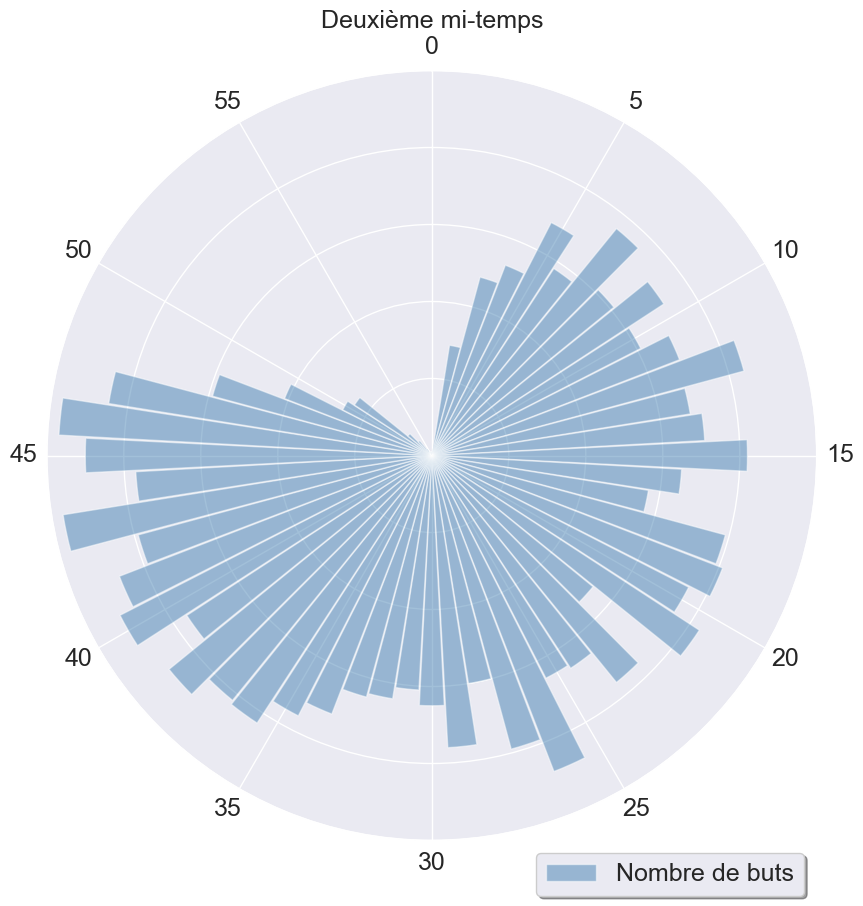

In [17]:
# Dimensions et forme de la figure pour ressembler à une horloge
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection = 'polar')

# Construction du diagramme en bâtons
ax.bar(mi_tps2_final['rad'],mi_tps1_final['count'],width = 0.1, alpha=0.5, color='steelblue',label='Nombre de buts')

# Labels dans le sens horaire
ax.set_theta_direction(-1)

# Placement du zéro au dessus de la figure
ax.set_theta_offset(np.pi/2)

# Placement correct des labels
ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))

# Nom des labels
ticks = ['0', '5', '10', '15', '20', '25', '30', '35','40','45','50','55']
ax.set_xticklabels(ticks,fontsize=18)

# Suppression des labels en radians
plt.setp(ax.get_yticklabels(), visible=False)

# Légende et graduations
plt.ylim(0,100)
plt.title('Deuxième mi-temps',fontsize=18)
plt.legend(bbox_to_anchor=(1,0), fancybox=True, shadow=True,fontsize=18)

# Sauvegarde de la figure
plt.savefig('buts_mitps2.png',dpi=300)

<center><h1 style="font-size: 20px;">II - Approche hypothético-déductive</h1></center>

<h1 style="font-size: 16px;">Première question d'étude : Pourquoi y a-t-il de moins en moins de buts marqués par match ?</h1>

Hypothèse: le nombre de buts dans un match est négativement corrélé au nombre de fautes commises.

_Importation du fichier_

In [18]:
# Importation avec le bon encodage du fichier contenant les données de fautes
cbef=pd.read_csv(r"\campeonato-brasileiro-estatisticas-full.csv",header=0,index_col=0,encoding='latin-1')
# Vérification de l'importation en affichant les premières lignes de code
cbef

,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
partida_id,,,,,,,,,,,,
1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4
8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6
8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5


_Vérification des données manquantes du fichier_

<AxesSubplot:>

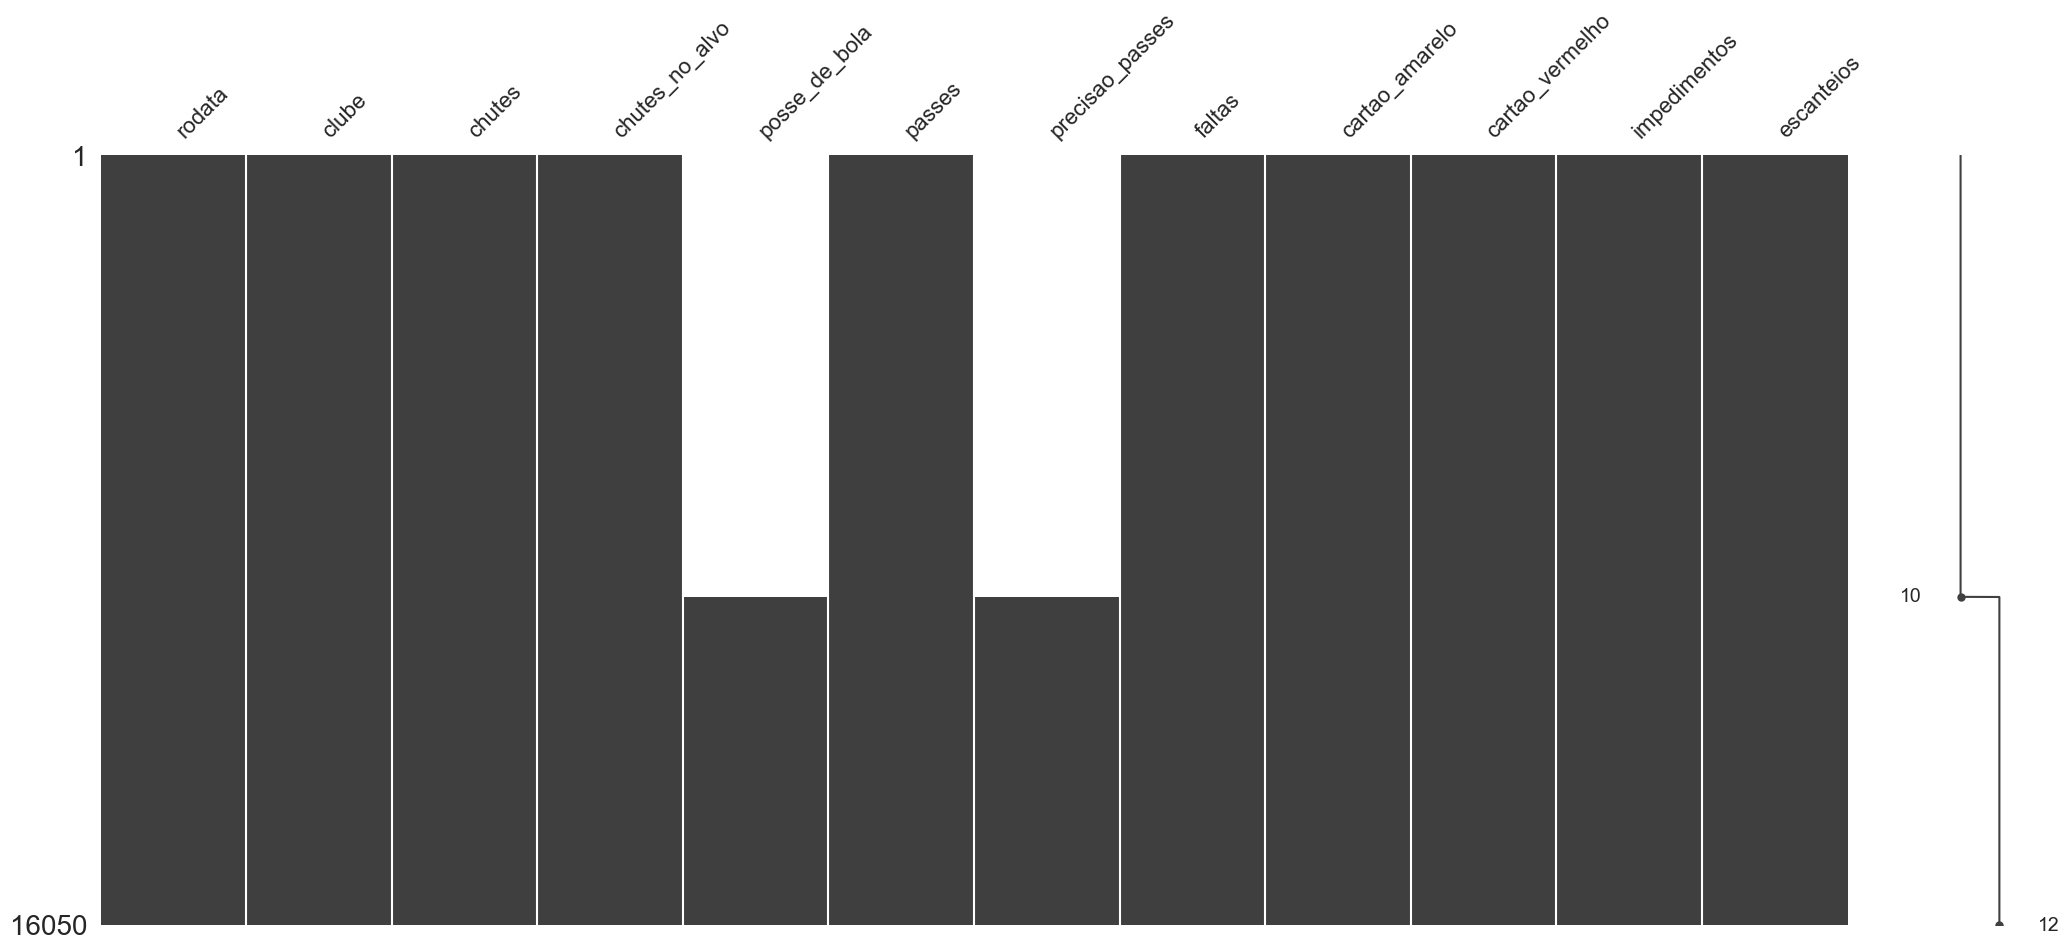

In [19]:
# Matrice de données manquantes du jeu de données cbef
msno.matrix(cbef)

_Modifications du fichier pour le rendre exploitable_

In [20]:
# Suppression des données manquantes
cbef=cbef.dropna()

# Nouveau tri pour enlever les données aberrantes 
#(on peut supposer sans grand risque de se tromper qu'aucun match de ligue 1 ne se déroule sans hors-jeu ou corners)
cbef_final = cbef[cbef['escanteios'] != 0]

# Affichage du dataframe obtenu
cbef_final

,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
partida_id,,,,,,,,,,,,
4741,13,Chapecoense,15,0,35%,280,None,19,4,0,0,8
4741,13,Flamengo,9,0,65%,509,None,13,1,0,1,5
4808,20,Palmeiras,10,0,44%,384,None,18,4,0,1,5
4808,20,Criciuma,10,0,56%,471,None,17,3,0,1,6
4833,22,Coritiba,9,0,43%,360,None,14,5,0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,38,Atletico-MG,17,7,41%,351,82%,19,6,0,0,4
8024,38,Internacional,15,8,48%,287,77%,13,2,0,1,6
8024,38,Palmeiras,11,2,52%,306,82%,17,3,0,2,5


_Sélection des données d'intérêt_

In [21]:
# Comptage du nombre de cartons jaunes, rouges, et du nombre de fautes de chaque match (partida_id)
cartoes = cbef_final.groupby('partida_id').agg({'cartao_amarelo': 'sum', 'cartao_vermelho': 'sum','faltas':'sum'})

# Affichage du dataframe
cartoes

,cartao_amarelo,cartao_vermelho,faltas
partida_id,,,
4698,4,0,29
4741,5,0,32
4808,7,0,35
4833,6,0,24
4846,6,0,34
...,...,...,...
8021,4,1,17
8022,5,0,31
8023,9,0,30


_Rassemblement des dataframes cartons et buts_

In [22]:
# Merge entre les dataframes gol et cartoes
merged_gol_cartoes = pd.merge(gol, cartoes, left_index=True, right_index=True)

# Affichage du dataframe obtenu
merged_gol_cartoes

,rodata,ano,mandante_Placar,visitante_Placar,total_Placar,cartao_amarelo,cartao_vermelho,faltas
partida_id,,,,,,,,
4741,13,2014,1,0,1,5,0,32
4808,20,2014,1,0,1,7,0,35
4833,22,2014,3,1,4,6,0,24
4846,23,2014,1,0,1,6,0,34
4853,24,2014,0,0,0,0,0,36
...,...,...,...,...,...,...,...,...
8021,38,2022,2,1,3,4,1,17
8022,38,2022,0,1,1,5,0,31
8023,38,2022,0,1,1,9,0,30


_Création du jointplot qui permet de voir s'il y a effectivement une corrélation entre le nombre de fautes commises et le nombre de buts marqués_

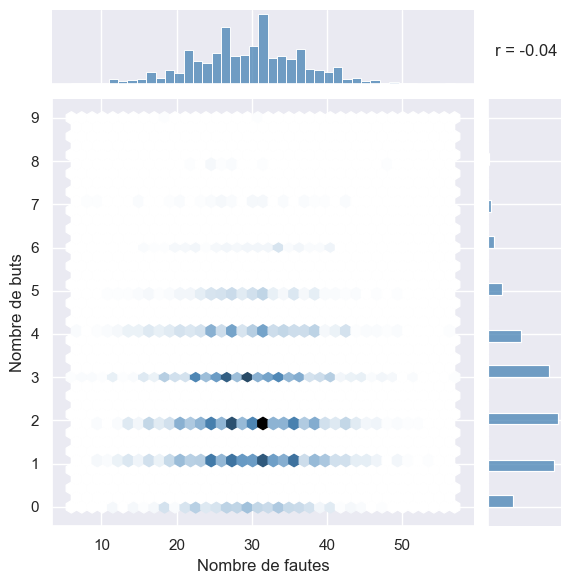

In [23]:
# Création du graphique hexagonal avec jointplot
joint = sns.jointplot(x=merged_gol_cartoes["faltas"], y=merged_gol_cartoes["total_Placar"], kind='hex', color='steelblue')

# Test du coefficient de corrélation et affichage de ce coefficient
corr_coef = merged_gol_cartoes["faltas"].corr(merged_gol_cartoes["total_Placar"])
joint.ax_joint.text(1.05, 1.1, f"r = {corr_coef:.2f}", transform=joint.ax_joint.transAxes)

# Titre des axes
joint.set_axis_labels('Nombre de fautes', 'Nombre de buts')

# Graduation de l'axe des ordonnées
plt.yticks(range(int(min(merged_gol_cartoes["total_Placar"])), int(max(merged_gol_cartoes["total_Placar"]))+1))

# Sauvegarde de la figure
plt.savefig('cor_faltas_gols.png', dpi=300,bbox_inches='tight')

# Affichage graphique
plt.show()

On voit qu'aucune de nos deux variables ne suit une loi normale. Nous allons donc transformer le nombre de buts en variable qualitative et en construisant des classes suivant le nombre de buts marqués.

In [24]:
# Vision globale sur le nombre de match concernés par x buts
gol_match=gol.groupby(['total_Placar']).size().reset_index(name='count')
gol_match

,total_Placar,count
0,0,641
1,1,1629
2,2,1953
3,3,1728
4,4,1092
5,5,568
6,6,249
7,7,118
8,8,35
9,9,8


On voit ici que les effectifs sont assez déséquilibrés, car dans la plupart des matchs, le nombre de buts est compris entre 1 et 4. Il a donc été décidé de transformer la variable discrète "total_Placar" en classes d'effectifs quasi équivalents :
Matchs à 0 ou 1 buts
Matchs à 2 buts
Matchs à 3 buts
Matchs à 4 buts et plus

In [25]:
# Rassemblement de certaines données ensemble pour créer des classes avec un nombre de matchs comparable
modifications = {0: '0-1',1:'0-1', 4: '4 et +',5:'4 et +',6:'4 et +',7:'4 et +',8:'4 et +',9:'4 et +',10:'4 et +',11:'4 et +'}
merged_gol_cartoes['total_Placar'] = merged_gol_cartoes['total_Placar'].replace(modifications)
merged_gol_cartoes

,rodata,ano,mandante_Placar,visitante_Placar,total_Placar,cartao_amarelo,cartao_vermelho,faltas
partida_id,,,,,,,,
4741,13,2014,1,0,0-1,5,0,32
4808,20,2014,1,0,0-1,7,0,35
4833,22,2014,3,1,4 et +,6,0,24
4846,23,2014,1,0,0-1,6,0,34
4853,24,2014,0,0,0-1,0,0,36
...,...,...,...,...,...,...,...,...
8021,38,2022,2,1,3,4,1,17
8022,38,2022,0,1,0-1,5,0,31
8023,38,2022,0,1,0-1,9,0,30


_Création du barplot qui serait support d'une éventuelle ANOVA_

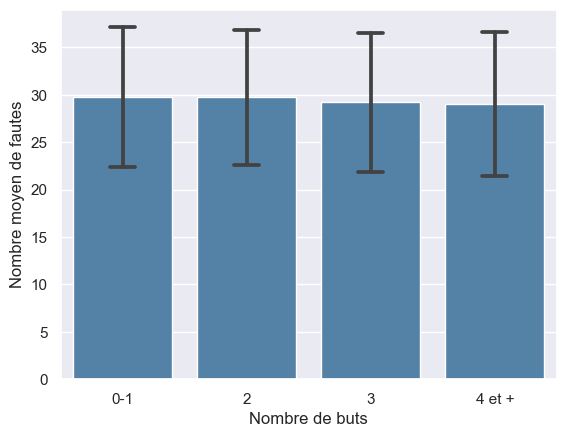

In [26]:
# Barplot
sns.barplot(
    x="total_Placar", 
    y="faltas", 
    data=merged_gol_cartoes, 
    ci='sd', capsize=0.2,
    order=['0-1',2,3,'4 et +'],
    color='steelblue');

# Labels des axes
plt.xlabel('Nombre de buts')
plt.ylabel('Nombre moyen de fautes')

# Sauvegarde de la figure
plt.savefig('faltas_gol.png',dpi=300)

Autre hypothèses : le nombre de fautes commises est en réalité lié plutôt à la précision des passes (moins les passes sont précises, plus les joueurs commettent des fautes)

In [27]:
# Sélection des deux colonnes d'intérêt
precisao_faltas=cbef_final[["precisao_passes",'faltas']]

# Nettoyage pour enlever les données manquantes (colonnes dans lesquelles on a 0 fautes, ce qui n'est pas cohérent)
precisao_faltas=precisao_faltas[precisao_faltas['faltas'] != 0]

# Suppression des lignes 'None' de la colonne 'precisao_passes'
precisao_faltas= precisao_faltas[precisao_faltas['precisao_passes'] != 'None']

# Transformation des pourcentages en integer
precisao_faltas['precisao_passes'] = precisao_faltas['precisao_passes'].str.rstrip('%').astype('int')
precisao_faltas['faltas']=precisao_faltas['faltas'].astype('int')

# Réinitialisation de l'index du dataframe precisao_faltas
precisao_faltas = precisao_faltas.reset_index(drop=True)

# Affichage du dataframe
precisao_faltas

,precisao_passes,faltas
0,81,20
1,86,15
2,88,24
3,72,10
4,90,7
...,...,...
3683,82,19
3684,77,13
3685,82,17
3686,80,12


_Graphique permettant de se rendre compte du nombre de fautes commises en fonction de la précision des passes_

(60.0, 100.0)

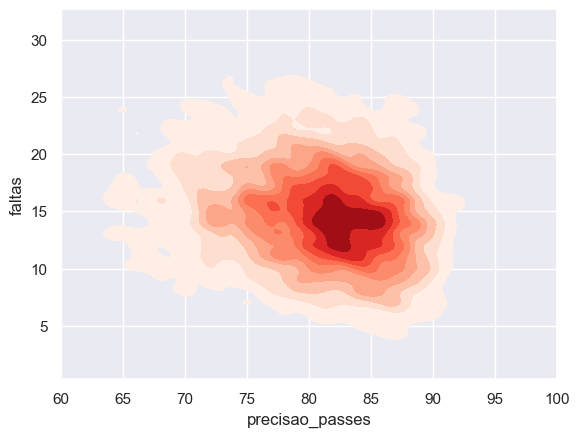

In [28]:
# Nuage de points sous forme de heatmap
fig, ax = plt.subplots()
sns.kdeplot(data=precisao_faltas, x='precisao_passes',y='faltas',cmap="Reds", shade=True, bw_adjust=.5)
ax.set_xlim(60, 100)

Le graphique ne montre pas vraiment de corrélation non plus, seulement une très légère tendance descendante : globalement, chaque équipe comment environ 15 fautes par match (soit 30 fautes au total sur le match), pour une précision de passe comprise entre 80 et 85%.

Dernière hypothèse : le nombre de cartons est plus élevé dans un match avec moins de buts

Text(0.5, 1.0, 'Histogramme du nombre moyen de cartons')

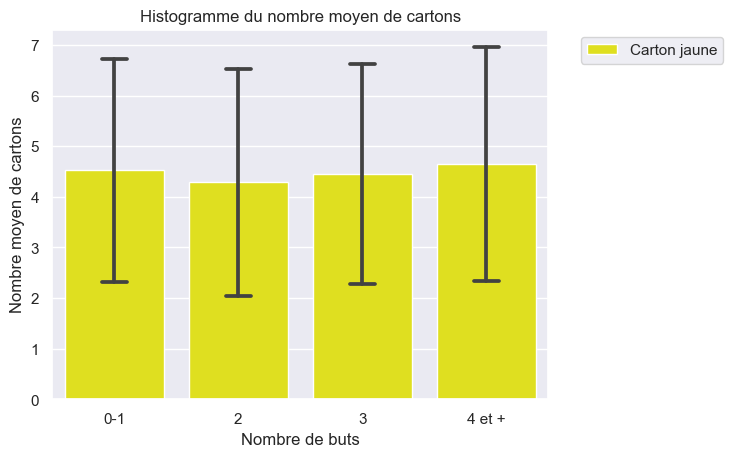

In [29]:
# Création de l'histogramme
sns.barplot(x='total_Placar',y='cartao_amarelo', data=merged_gol_cartoes, 
            color='yellow', label='Carton jaune',
            order=['0-1',2,3,'4 et +'],ci='sd',capsize=0.2)


# Légende, titre et labels d'axe
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Nombre de buts')
plt.ylabel('Nombre moyen de cartons')
plt.title('Histogramme du nombre moyen de cartons')


<center><h1 style="font-size: 20px;">III - Approche prédictive </h1></center>

<h1 style="font-size: 16px;">Première question d'étude : Peut-on prévoir l'issue de chaque match de Série A du championnat brésilien et ainsi connaître dès le début de la saison les équipes qui composeront le Top 5 ?</h1>

L'idée est d'utiliser deux prédicteurs simples qui sont la possession de balle et la précision des passes (recodés pour devenir des variables qualitatives) sur la variable binomiale dont les deux issues sont "gagner un match" et "perdre un match".

_Sélection des prédicteurs_

In [30]:
# Sélection de la possession de balle et précision des passes
cbef_pred=cbef_final[["clube","posse_de_bola","precisao_passes"]]

# Suppression des lignes 'none'
cbef_pred=cbef_pred[cbef_pred['precisao_passes']!='None']

# Transformation des deux colonnes 'posse_de_bola' et 'precisao_passes' en integer
cbef_pred['precisao_passes'] = cbef_pred['precisao_passes'].str.rstrip('%').astype('int')
cbef_pred['posse_de_bola'] = cbef_pred['posse_de_bola'].str.rstrip('%').astype('int')

# Affichage du dataframe obtenu
cbef_pred

,clube,posse_de_bola,precisao_passes
partida_id,,,
6126,Cruzeiro,40,81
6126,Gremio,60,86
6127,Vitoria,66,88
6127,Flamengo,34,72
6128,Santos,54,90
...,...,...,...
8023,Atletico-MG,41,82
8024,Internacional,48,77
8024,Palmeiras,52,82


_Sélection de la variable réponse_

In [31]:
cbf_rep=cbf[["mandante","visitante","mandante_Placar","visitante_Placar"]]
cbf_rep=cbf_rep.loc[cbf_rep.index > 6125]
cbf_rep

,mandante,visitante,mandante_Placar,visitante_Placar
partida_id,,,,
6126,Cruzeiro,Gremio,0,1
6127,Vitoria,Flamengo,2,2
6128,Santos,Ceara,2,0
6129,America-MG,Sport,3,0
6130,Vasco,Atletico-MG,2,1
...,...,...,...,...
8021,Cuiaba,Coritiba,2,1
8022,Bragantino,Fluminense,0,1
8023,Corinthians,Atletico-MG,0,1


_Rassemblement des deux dataframes_

In [32]:
prediction=pd.merge(cbef_pred, cbf_rep, how='outer', left_index=True, right_index=True)
prediction

,clube,posse_de_bola,precisao_passes,mandante,visitante,mandante_Placar,visitante_Placar
partida_id,,,,,,,
6126,Cruzeiro,40.0,81.0,Cruzeiro,Gremio,0,1
6126,Gremio,60.0,86.0,Cruzeiro,Gremio,0,1
6127,Vitoria,66.0,88.0,Vitoria,Flamengo,2,2
6127,Flamengo,34.0,72.0,Vitoria,Flamengo,2,2
6128,Santos,54.0,90.0,Santos,Ceara,2,0
...,...,...,...,...,...,...,...
8023,Atletico-MG,41.0,82.0,Corinthians,Atletico-MG,0,1
8024,Internacional,48.0,77.0,Internacional,Palmeiras,3,0
8024,Palmeiras,52.0,82.0,Internacional,Palmeiras,3,0


_Construction des colonnes variables : posse_de_bola / precisao_passes / Gain du match_

In [33]:
# Colonne Possession
prediction['possession']=prediction['posse_de_bola'].apply(lambda x: 'moins de 50%' if x < 50 
                                                           else 'plus de 50%')

# Colonne Précision passe
prediction['précision'] = prediction['precisao_passes'].apply(lambda x: 'moyenne' if x < 75 
                                                              else ('bonne' if 75 <= x <= 85 
                                                                else 'très bonne'))

# Colonne match gagné (1) ou perdu (0)
prediction['vainqueur'] = prediction.apply(lambda row: row['mandante'] if row['mandante_Placar'] > row['visitante_Placar']
                                         else (row['visitante'] if row['mandante_Placar'] < row['visitante_Placar']
                                         else 'match nul'), axis=1)
prediction['match_gagné'] = prediction.apply(lambda row: 1 if row['clube'] == row['vainqueur'] else 0, axis=1)

# Affichage du résultat
prediction

,clube,posse_de_bola,precisao_passes,mandante,visitante,mandante_Placar,visitante_Placar,possession,précision,vainqueur,match_gagné
partida_id,,,,,,,,,,,
6126,Cruzeiro,40.0,81.0,Cruzeiro,Gremio,0,1,moins de 50%,bonne,Gremio,0
6126,Gremio,60.0,86.0,Cruzeiro,Gremio,0,1,plus de 50%,très bonne,Gremio,1
6127,Vitoria,66.0,88.0,Vitoria,Flamengo,2,2,plus de 50%,très bonne,match nul,0
6127,Flamengo,34.0,72.0,Vitoria,Flamengo,2,2,moins de 50%,moyenne,match nul,0
6128,Santos,54.0,90.0,Santos,Ceara,2,0,plus de 50%,très bonne,Santos,1
...,...,...,...,...,...,...,...,...,...,...,...
8023,Atletico-MG,41.0,82.0,Corinthians,Atletico-MG,0,1,moins de 50%,bonne,Atletico-MG,1
8024,Internacional,48.0,77.0,Internacional,Palmeiras,3,0,moins de 50%,bonne,Internacional,1
8024,Palmeiras,52.0,82.0,Internacional,Palmeiras,3,0,plus de 50%,bonne,Internacional,0


_Construction du modèle_

In [34]:
#Modèle
model = smf.glm('match_gagné ~ possession + précision', data=prediction, family=sm.families.Binomial()).fit()

#Paramètres
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            match_gagné   No. Observations:                 3712
Model:                            GLM   Df Residuals:                     3708
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2393.0
Date:                Thu, 20 Jul 2023   Deviance:                       4786.0
Time:                        19:05:47   Pearson chi2:                 3.71e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01197
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.5664      0.057     -9.898      0.000      -0.679      -0.454
possession[T.plus de 50%]    -0.3424      0.081     -4.247      0.000      -0.500      -0.184
précision[T.moyenne]          0.2073      0.104      1.995      0.046       0.004       0.411
précision[T.très bonne]       0.5213      0.092      5.654      0.000       0.341       0.702
=============================================================================================
"""

In [35]:
# Construction de la table d'odds ratios du modèle logistique
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
conf=np.exp(conf)
conf['pvalues'] = model.pvalues
conf

,Lower CI,Upper CI,OR,pvalues
Intercept,0.507342,0.634919,0.567557,4.234109e-23
possession[T.plus de 50%],0.606283,0.831618,0.710067,2.166586e-05
précision[T.moyenne],1.003653,1.508160,1.230313,4.603566e-02
précision[T.très bonne],1.405815,2.017916,1.684285,1.567767e-08


_Création d'une table d'odds ratios exploitable_

In [36]:
# Modification de la table d'odds ratios
conf2=conf[['OR','Lower CI','Upper CI','pvalues']]
conf2= conf2.drop('Intercept',axis=0)

# Modification de plusieurs intitulés de lignes
conf2 = conf2.rename(index={'possession[T.plus de 50%]': '50% et plus',
                            'précision[T.moyenne]': 'Moins de 75%',
                           'précision[T.très bonne]': 'Plus de 85%'})

# Modification des p-values
conf2['p_value'] = conf2['pvalues'].map(lambda x : round(x,2) if round(x,2)!=0 else np.format_float_scientific(x, precision = 2, exp_digits=2))


# Création d'un DataFrame pour la ligne à insérer avant la première ligne avec un nom d'index
new_row_before = pd.DataFrame([[1, 1, 1]], 
                              columns=['OR', 'Lower CI', 'Upper CI'], 
                              index=['Moins de 50%'])

# Création d'un DataFrame pour la ligne à insérer après la première ligne avec un nom d'index
new_row_after = pd.DataFrame([[1,1,1 ]], 
                             columns=['OR', 'Lower CI', 'Upper CI'], 
                             index=['Entre 75% et 85%'])

# Concaténation des DataFrames
conf2 =pd.concat([new_row_before, conf2.iloc[0:1], new_row_after,conf2.iloc[1:3]])
conf2

,OR,Lower CI,Upper CI,pvalues,p_value
Moins de 50%,1.000000,1.000000,1.000000,NaN,NaN
50% et plus,0.710067,0.606283,0.831618,2.166586e-05,2.17e-05
Entre 75% et 85%,1.000000,1.000000,1.000000,NaN,NaN
Moins de 75%,1.230313,1.003653,1.508160,4.603566e-02,0.05
Plus de 85%,1.684285,1.405815,2.017916,1.567767e-08,1.57e-08


_Construction du graphique_

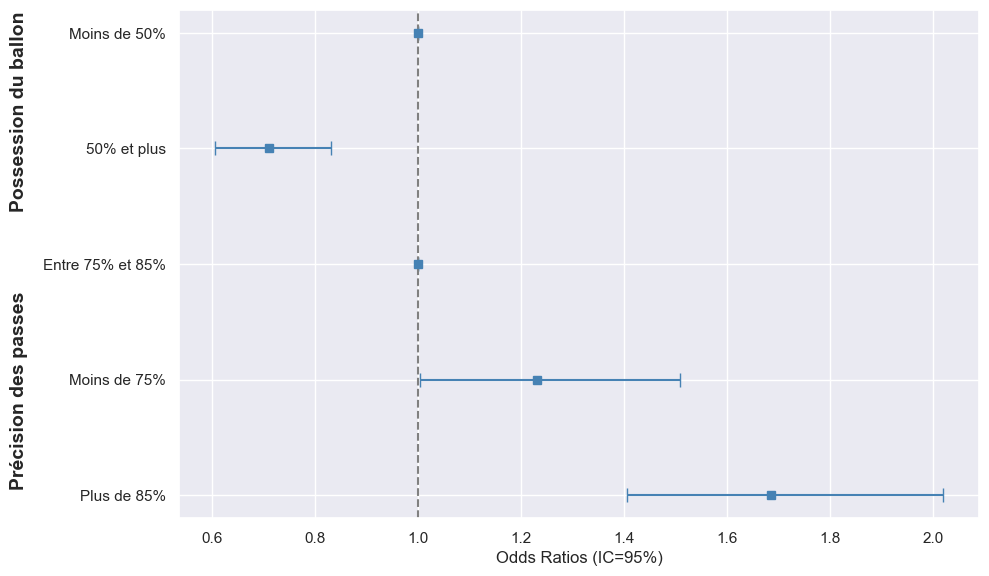

In [37]:
# Données à partir du tableau conf
labels = conf2.index[::-1]
or_values = conf2['OR'][::-1]
ci_lower = conf2['Lower CI'][::-1]
ci_upper = conf2['Upper CI'][::-1]

# Création du forest plot
plt.figure(figsize=(10, 6))
plt.errorbar(or_values, range(len(or_values)),
             xerr=[or_values - ci_lower, ci_upper - or_values],
             fmt='s', color='steelblue', ecolor='steelblue', capsize=5)

# Ajout des étiquettes pour chaque variable
plt.yticks(range(len(labels)), labels)

# Ajout d'une ligne verticale à la valeur de référence (OR = 1)
plt.axvline(x=1, color='gray', linestyle='--')

# Personnalisation des axes et du titre
plt.xlabel('Odds Ratios (IC=95%)')


# Ajout du texte explicatif sur le côté gauche
plt.text(-0.2, 0.8, "Possession du ballon", transform=plt.gca().transAxes,
         ha='center', va='center', rotation=90, fontsize=14, fontweight='bold')

plt.text(-0.2, 0.25, "Précision des passes", transform=plt.gca().transAxes,
         ha='center', va='center', rotation=90, fontsize=14, fontweight='bold')


# Sauvegarde du graphique
plt.savefig('forestplot_possession_precision.png', dpi=300, bbox_inches='tight')

# Affichage du graphique
plt.tight_layout()

<center><h1 style="font-size: 20px;">IV - Recherche de patterns </h1></center>

<h1 style="font-size: 16px;">Première question d'étude : Exisite-t-il une saisonnalité sur le nombre de buts marqués par match ?</h1>


Préparation des données pour les années 2017 à 2022 (à partir du moment où ce ne sont que 20 équipes qui sont sélectionnées en Série A, soit 28 "rodadas").

In [38]:
# Année 2017
gol_rodata_2017= gol[gol['ano'] == 2017]
# Rassemblement des données souhaitées : nombre moyen de but par 'rodata', c'est-à-dire par tour
gol_rodata_2017=gol_rodata_2017.groupby('rodata')['total_Placar'].mean().reset_index(name="mean_Placar")

# Année 2018
gol_rodata_2018= gol[gol['ano'] == 2018]
# Rassemblement des données souhaitées : nombre moyen de but par 'rodata', c'est-à-dire par tour
gol_rodata_2018=gol_rodata_2018.groupby('rodata')['total_Placar'].mean().reset_index(name="mean_Placar")

# Année 2019
gol_rodata_2019= gol[gol['ano'] == 2019]
# Rassemblement des données souhaitées : nombre moyen de but par 'rodata', c'est-à-dire par tour
gol_rodata_2019=gol_rodata_2019.groupby('rodata')['total_Placar'].mean().reset_index(name="mean_Placar")

# Année 2020 (année COVID particulière)
gol_rodata_2020= gol[gol['ano'] == 2020]
# Rassemblement des données souhaitées : nombre moyen de but par 'rodata', c'est-à-dire par tour
gol_rodata_2020=gol_rodata_2020.groupby('rodata')['total_Placar'].mean().reset_index(name="mean_Placar")

# Année 2021
gol_rodata_2021= gol[gol['ano'] == 2021]
# Rassemblement des données souhaitées : nombre moyen de but par 'rodata', c'est-à-dire par tour
gol_rodata_2021=gol_rodata_2021.groupby('rodata')['total_Placar'].mean().reset_index(name="mean_Placar")

#Année 2022
gol_rodata_2022= gol[gol['ano'] == 2022]
# Rassemblement des données souhaitées : nombre moyen de but par 'rodata', c'est-à-dire par tour
gol_rodata_2022=gol_rodata_2022.groupby('rodata')['total_Placar'].mean().reset_index(name="mean_Placar")

_Création des six graphiques pour recherche de patterns_

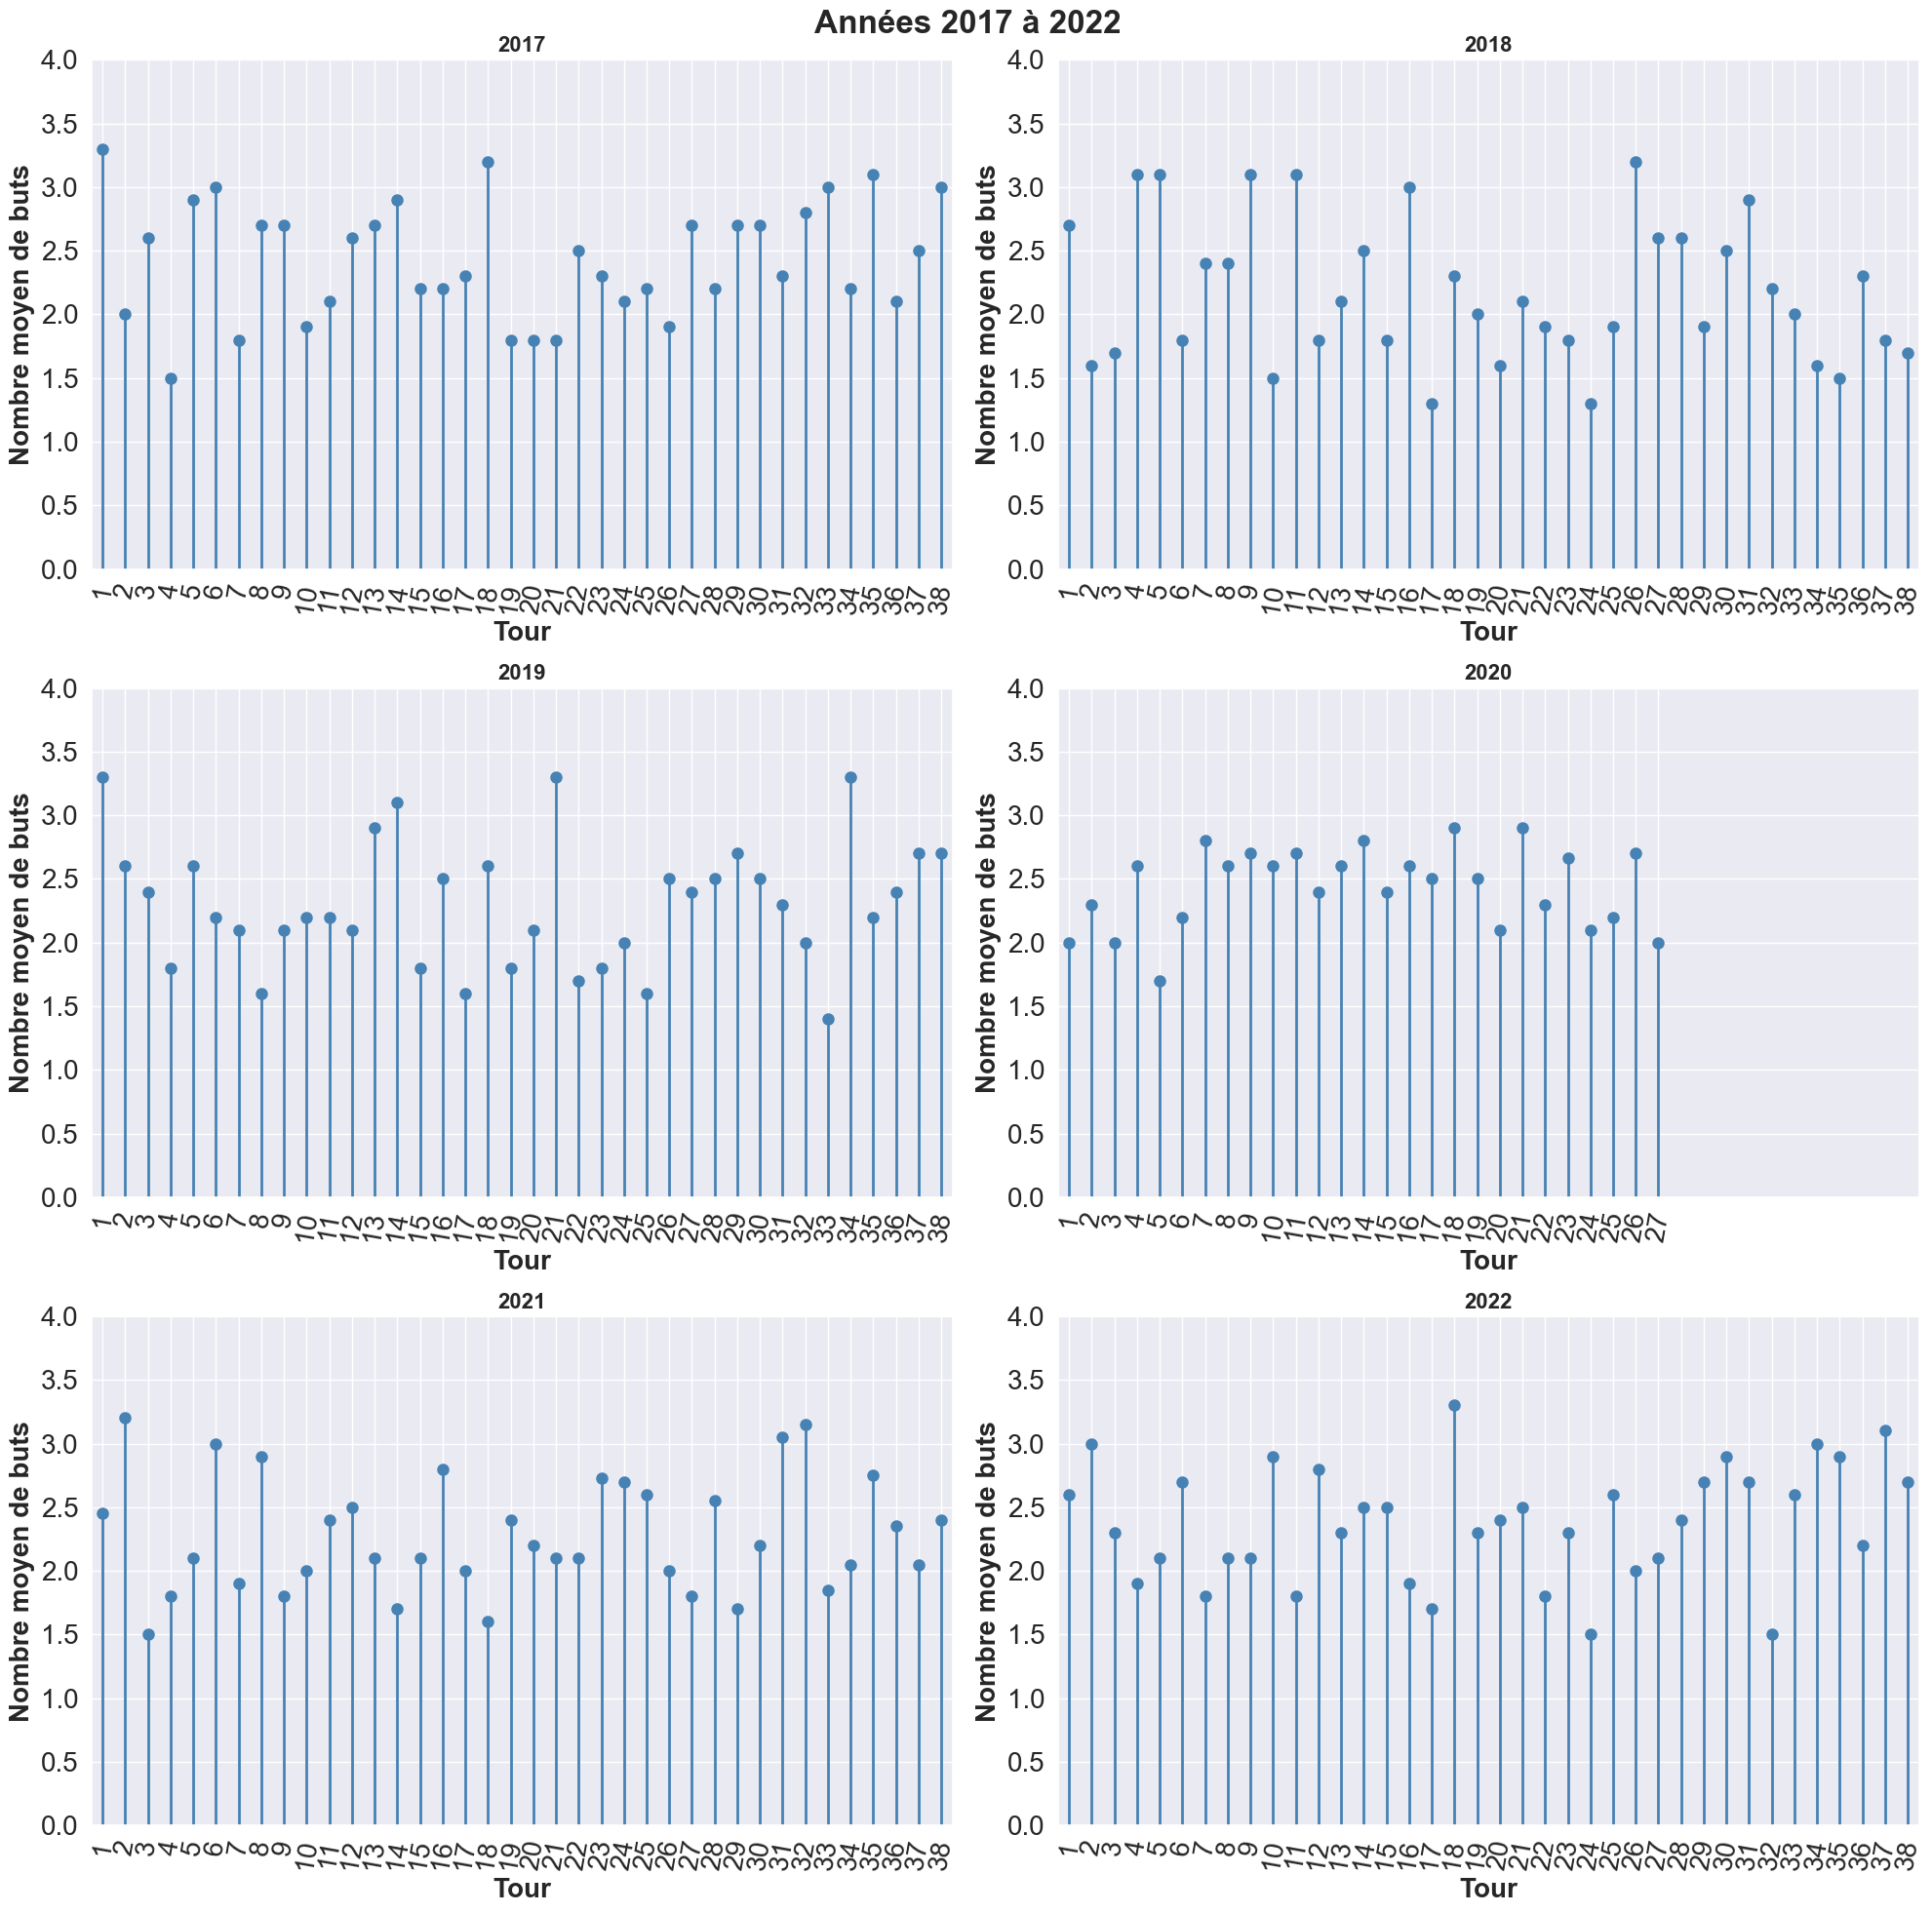

In [39]:
import matplotlib.pyplot as plt

# Liste des noms des dataframes
dataframes = ['gol_rodata_2017', 'gol_rodata_2018', 'gol_rodata_2019', 'gol_rodata_2020', 'gol_rodata_2021', 'gol_rodata_2022']

# Années correspondantes
annees = [int(df.split('_')[-1]) for df in dataframes]

# Création de la figure et des axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Tracé des stems (lollipops) pour chaque subplot
for i, ax in enumerate(axes.flatten()):
    dataframe = dataframes[i]
    annee = annees[i]
    
    # Récupération des données du dataframe
    rodata = globals()[dataframe]['rodata']
    mean_Placar = globals()[dataframe]['mean_Placar']
    
    # Tracé des stems (lollipops)
    markerline, stemline, baseline = ax.stem(rodata, mean_Placar, linefmt='steelblue', markerfmt='o', basefmt=' ')
    
    # Personnalisation des stems
    plt.setp(markerline, color='steelblue', markersize=8)
    plt.setp(stemline, color='steelblue', linewidth=2)
    plt.setp(baseline, visible=False)
    
    # Paramètres d'axe
    ax.set_xlabel('Tour', fontsize=20, fontweight='bold')
    ax.set_ylabel('Nombre moyen de buts', fontsize=20, fontweight='bold')
    
    # Ajustement des limites des axes
    ax.set_xlim(0.5, 38.5)
    ax.set_ylim(0, 4)
    
    # Ajustement des étiquettes de l'axe x
    ax.set_xticks(rodata)
    ax.set_xticklabels(rodata, rotation=80)
    
    ax.tick_params(axis='both', labelsize=20)
    ax.title.set_fontsize(20)
    
    # Ajouter le sous-titre avec l'année
    ax.set_title(f'{annee}', fontsize=16, fontweight='bold')

# Ajouter un titre à la figure
fig.suptitle('Années 2017 à 2022', fontsize=24, fontweight='bold')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Sauvegarde du graphique
plt.savefig('stems.png', dpi=400, bbox_inches='tight')

# Affichage du graphique
plt.show()
